# 21강. 딥러닝 들여다보기

## 21-2. 신경망 구성_개요

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

# 모델에 맞게 데이터 가공
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_reshaped = x_train_norm.reshape(-1, x_train_norm.shape[1]*x_train_norm.shape[2])
x_test_reshaped = x_test_norm.reshape(-1, x_test_norm.shape[1]*x_test_norm.shape[2])

# 딥러닝 모델 구성 - 2 Layer Perceptron
model=keras.models.Sequential()
model.add(keras.layers.Dense(50, activation='sigmoid', input_shape=(784,)))  # 입력층 d=784, 은닉층 레이어 H=50
model.add(keras.layers.Dense(10, activation='softmax'))   # 출력층 레이어 K=10
model.summary()

# 모델 구성과 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs=10)

# 모델 테스트 결과
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5101 - accuracy: 0.8776
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2373 - accuracy: 0.9333
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1847 - accuracy: 0.9477
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1524 - accuracy: 0.9567
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1299 - accuracy: 0.9628
Epoc

In [3]:
# 입력층 데이터의 모양(shape)
print(x_train_reshaped.shape)

# 테스트를 위해 x_train_reshaped의 앞 5개의 데이터를 가져온다.
X = x_train_reshaped[:5]

(60000, 784)


In [4]:
# y = W * X + b
weight_init_std = 0.1
input_size = 784
hidden_size=50

# 인접 레이어간 관계를 나타내는 파라미터 W를 생성하고 random 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)  
# 바이어스 파라미터 b를 생성하고 Zero로 초기화
b1 = np.zeros(hidden_size)

a1 = np.dot(X, W1) + b1   # 은닉층 출력

print(f'W1.shape:',W1.shape)
print(f'X.shape:',X.shape)
print(f'b1.shape:', b1.shape)
print(f'a1.shape:',a1.shape)

W1.shape: (784, 50)
X.shape: (5, 784)
b1.shape: (50,)
a1.shape: (5, 50)


In [5]:
# 첫 번째 데이터의 은닉층 출력을 확인
a1[0]
# 50dim의 벡터

array([-0.38957377,  0.8572557 ,  0.16891695,  1.41374367,  0.87446826,
       -0.2917002 ,  0.28640712, -1.52144698,  1.48290531,  0.40034768,
        0.42209675,  1.10503976, -0.72577863,  1.20461748, -0.42522307,
       -1.22817722,  0.23211036, -0.4872939 ,  1.14573211,  1.07299091,
        0.36400616, -0.33994456, -1.98109048, -1.30249048, -2.48145648,
       -0.12131597, -0.82626131, -0.43241986,  0.5619022 ,  1.17747515,
        0.77957244,  0.27270312, -0.34781594,  0.25305747,  0.01182358,
        0.19975873, -1.10581762,  0.46203373, -2.18426283,  0.94166748,
        0.14203469, -0.40436197, -0.94027545,  0.17447291, -0.11583733,
       -0.60418879, -1.4414609 ,  0.48322648,  0.32168794, -0.29930116])

## 21-3. 신경망 구성_활성화 함수와 손실함수

In [6]:
# sigmoid 함수를 구현
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  


z1 = sigmoid(a1)
print(z1[0])  # sigmoid의 출력은 모든 element가 0에서 1사이

[0.40381991 0.70208697 0.54212911 0.80435575 0.7056746  0.42758768
 0.57111631 0.17924854 0.81501101 0.59877119 0.60398488 0.75120321
 0.32612176 0.76934519 0.39526759 0.22650061 0.55776846 0.38053126
 0.75873051 0.74516529 0.59000987 0.41582294 0.12120264 0.21374617
 0.07716842 0.46970815 0.30443618 0.39354864 0.63689256 0.76449353
 0.68558796 0.5677564  0.41391215 0.5629289  0.50295586 0.54977428
 0.24865143 0.61349652 0.10117262 0.71943636 0.5354491  0.40026478
 0.28084471 0.54350792 0.47107301 0.35338595 0.19131922 0.61850947
 0.57973556 0.42572833]


In [7]:
# 단일 레이어 구현 함수
def affine_layer_forward(X, W, b):
    y = np.dot(X, W) + b
    cache = (X, W, b) # 캐시 : 컴퓨터 과학에서 데이터나 값을 미리 복사해 놓는 임시 장소
    return y, cache

In [8]:
input_size = 784
hidden_size = 50
output_size = 10

W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)    # z1이 다시 두번째 레이어의 입력이 됩니다. 

print(a2[0])  # 최종 출력이 output_size만큼의 벡터가 되었습니다.

[-0.12630574 -0.05857878 -0.62883512 -0.38380857  0.24998636 -0.10314484
  0.53471505 -0.38614809 -0.52889338 -0.00952815]


In [9]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

In [10]:
y_hat = softmax(a2)
y_hat[0]  # 10개의 숫자 중 하나일 확률이 되었습니다.

array([0.09588874, 0.10260796, 0.05801254, 0.07412002, 0.13969768,
       0.09813552, 0.18571427, 0.07394682, 0.06411003, 0.10776642])

In [11]:
# 정답 라벨을 One-hot 인코딩하는 함수
def _change_one_hot_label(X, num_category):
    T = np.zeros((X.size, num_category))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T

Y_digit = y_train[:5]
t = _change_one_hot_label(Y_digit, 10)
t     # 정답 라벨의 One-hot 인코딩

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [12]:
print(y_hat[0])
print(t[0])

[0.09588874 0.10260796 0.05801254 0.07412002 0.13969768 0.09813552
 0.18571427 0.07394682 0.06411003 0.10776642]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


softmax(a2)와 정답 라벨의 원핫인코딩 분포 다르다. (softmax(a2)에 따르면 원핫인코딩 결과값이 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0]이어야 함)

In [13]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1) # argmax는 통해 원핫벡터의 1을 뽑아낸다.
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

Loss = cross_entropy_error(y_hat, t)
Loss

2.272703577362145

## 21-4. 경사하강법

In [14]:
batch_num = y_hat.shape[0]
dy = (y_hat - t) / batch_num
dy # softmax값의 출력으로 Loss를 미분한 값

array([[ 0.01917775,  0.02052159,  0.01160251,  0.014824  ,  0.02793954,
        -0.1803729 ,  0.03714285,  0.01478936,  0.01282201,  0.02155328],
       [-0.1787639 ,  0.01941572,  0.01087167,  0.01374963,  0.02859975,
         0.01920379,  0.03839395,  0.01497957,  0.01235843,  0.02119139],
       [ 0.0187602 ,  0.02039152,  0.00973715,  0.01452595, -0.17780563,
         0.01770643,  0.04328464,  0.01781068,  0.01337014,  0.02221892],
       [ 0.01855895, -0.18302528,  0.00926581,  0.01467988,  0.02702367,
         0.01738895,  0.04616014,  0.01476674,  0.01203984,  0.0231413 ],
       [ 0.01944921,  0.02086734,  0.00937767,  0.01295751,  0.02612838,
         0.0161313 ,  0.04321024,  0.01644917,  0.01176669, -0.17633752]])

In [15]:
# 파라미터 기울기 얻기
dW2 = np.dot(z1.T, dy)
dW2

array([[-0.07702224, -0.09522891,  0.03967532,  0.05529782, -0.0342538 ,
        -0.07896348,  0.16356773,  0.06153795,  0.04865479, -0.0832652 ],
       [-0.11691434, -0.02309681,  0.03108364,  0.04199753,  0.00037351,
        -0.11583634,  0.1198529 ,  0.04588395,  0.03702573, -0.02036978],
       [-0.02208969, -0.08988867,  0.02160864,  0.03037741, -0.00655293,
        -0.06851536,  0.08892644,  0.03289963,  0.02641547, -0.01318094],
       [-0.10070654, -0.07189229,  0.0290688 ,  0.04051716, -0.0509876 ,
        -0.03529005,  0.11888939,  0.04488165,  0.0357061 , -0.01018662],
       [-0.01498758, -0.04373003,  0.01793116,  0.02555182, -0.06656918,
        -0.01033213,  0.07673619,  0.02908189,  0.02262655, -0.0363087 ],
       [-0.01042052, -0.00627775,  0.00933404,  0.01324959, -0.06005387,
        -0.00760054,  0.0391416 ,  0.0152394 ,  0.01185121, -0.00446315],
       [-0.06290318, -0.0356718 ,  0.02731489,  0.03817292, -0.05945655,
        -0.01303278,  0.11457421,  0.04364036

In [17]:
dW2 = np.dot(z1.T, dy)
db2 = np.sum(dy, axis=0)

In [18]:
# sigmoid -> 활성화함수에 대한 gradient 고려
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [19]:
dz1 = np.dot(dy, W2.T)
da1 = sigmoid_grad(a1) * dz1
dW1 = np.dot(X.T, da1)
db1 = np.sum(dz1, axis=0)

In [20]:
# 파라미터 업데이트 함수(learning_rate 고려)
learning_rate= 0.1

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    return W1, b1, W2, b2

## 21-5. 오차역전파법

In [21]:
# 오차역전파법 함수
def affine_layer_backward(dy, cache):
    X, W, b = cache
    dX = np.dot(dy, W.T)
    dW = np.dot(X.T, dy)
    db = np.sum(dy, axis=0)
    return dX, dW, db

In [22]:
# Forward Propagation과 Backward Propagation 한 사이클 엮기
# 파라미터 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

# Forward Propagation
a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)

# 추론과 오차(Loss) 계산
y_hat = softmax(a2)
t = _change_one_hot_label(Y_digit, 10) # 정답 원-핫 인코딩
Loss = cross_entropy_error(y_hat, t)

print(y_hat)
print(t)
print('Loss: ', Loss)

dy = (y_hat - t) / X.shape[0]
dz1, dW2, db2 = affine_layer_backward(dy, cache2)
da1 = sigmoid_grad(a1) * dz1
dX, dW1, db1 = affine_layer_backward(da1, cache1)

# 경사하강법을 통한 파라미터 업데이트
learning_rate = 0.1
W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

[[0.08333226 0.06095391 0.10342926 0.09422486 0.08623971 0.11810705
  0.06624299 0.16601671 0.09854449 0.12290875]
 [0.09181341 0.06728158 0.10195852 0.08070137 0.08505404 0.11200224
  0.07999305 0.17987247 0.11900441 0.0823189 ]
 [0.10968097 0.05058397 0.11751285 0.10041813 0.09495739 0.1106057
  0.06645485 0.1302965  0.13854707 0.08094256]
 [0.09652955 0.0713166  0.0992916  0.11434423 0.08819988 0.09829388
  0.07883646 0.14093702 0.13448319 0.07776761]
 [0.09060828 0.06073441 0.11207946 0.08676518 0.08858176 0.1255535
  0.08325008 0.13892438 0.13671688 0.07678606]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.4171692169085297


## 21-6. 모델 학습 Step-by-Step

In [25]:
# Forward Propagation과 Backward Propagation 함수
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

def train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=False):
    a1, cache1 = affine_layer_forward(X, W1, b1)
    z1 = sigmoid(a1)
    a2, cache2 = affine_layer_forward(z1, W2, b2)
    y_hat = softmax(a2)
    t = _change_one_hot_label(Y, 10)
    Loss = cross_entropy_error(y_hat, t)
    
    if verbose:
        print('---------')
        print(y_hat)
        print(t)
        print('Loss: ', Loss)
        
    dy = (y_hat - t) / X.shape[0]
    dz1, dW2, db2 = affine_layer_backward(dy, cache2)
    da1 = sigmoid_grad(a1) * dz1
    dX, dW1, db1 = affine_layer_backward(da1, cache1)
    
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    return W1, b1, W2, b2, Loss

In [26]:
X = x_train_reshaped[:5]
Y = y_train[:5]

# train_step을 다섯 번 반복
for i in range(5):
    W1, b1, W2, b2, _ = train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=True)

---------
[[0.11389348 0.17201912 0.09823219 0.11225624 0.10356295 0.06114577
  0.06909157 0.06888597 0.10360014 0.09731258]
 [0.10036623 0.17223639 0.10716323 0.12745964 0.09925388 0.05975741
  0.05801748 0.07236815 0.10013855 0.10323905]
 [0.10270824 0.15910648 0.09854196 0.13680172 0.13200884 0.06127315
  0.05342207 0.05862982 0.11655719 0.08095052]
 [0.10190745 0.16923862 0.08489314 0.1436355  0.12515118 0.06299888
  0.06279399 0.06142629 0.09981666 0.08813829]
 [0.0904185  0.15505293 0.09115757 0.14809031 0.12844992 0.06598152
  0.05103116 0.06725211 0.10575585 0.09681015]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.245951897795816
---------
[[0.12942132 0.17913738 0.08577178 0.09154315 0.11253105 0.07647862
  0.0632263  0.0620371  0.08801176 0.11184156]
 [0.11918045 0.17917847 0.09482174 0.10371291 0.10678424 0.07221594
  0.05317788 0.06594191 0.0853

모델이 추론한 확률값 y_hat이 정답의 One-hot 인코딩 t값에 조금씩 근접하는 것과, Loss가 점점 감소

## 21-7. 추론 과정 구현과 정확도(Accuracy) 계산
숫자를 인식(Predict)해 보고, 그 정확도(Accuracy)를 측정하기

In [27]:
def predict(W1, b1, W2, b2, X):
    a1 = np.dot(X, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)
    
    return y

In [28]:
# X = x_train[:100]에 대해 모델 추론 시도
X = x_train_reshaped[:100]
Y = y_test[:100]
result = predict(W1, b1, W2, b2, X)
result[0]

array([0.16762285, 0.18047892, 0.0527861 , 0.04904727, 0.12640802,
       0.14272356, 0.04328561, 0.04023246, 0.05060257, 0.14681263])

In [29]:
# 정확도 계산
def accuracy(W1, b1, W2, b2, x, y):
    y_hat = predict(W1, b1, W2, b2, x)
    y_hat = np.argmax(y_hat, axis=1)
    
    accuracy = np.sum(y_hat == y) / float(x.shape[0])
    return accuracy

In [30]:
acc = accuracy(W1, b1, W2, b2, X, Y)

t = _change_one_hot_label(Y, 10)
print(result[0])
print(t[0])
print(acc)

[0.16762285 0.18047892 0.0527861  0.04904727 0.12640802 0.14272356
 0.04328561 0.04023246 0.05060257 0.14681263]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
0.12


5번의 학습으로는 정확도가 12%정도밖에 나오지 않는다.

## 21-8. 전체 학습 사이클 수행

In [31]:
# 학습시킬 파라미터를 초기화하는 함수
def init_params(input_size, hidden_size, output_size, weight_init_std=0.01):
    
    W1 = weight_init_std * np.random.randn(input_size, hidden_size)
    b1 = np.zeros(hidden_size)
    W2 = weight_init_std * np.random.randn(hidden_size, output_size)
    b2 = np.zeros(output_size)
    
    print(W1.shape)
    print(b1.shape)
    print(W2.shape)
    print(b2.shape)
    
    return W1, b1, W2, b2

In [33]:
# 하이퍼파라미터
iters_num = 50000 # 반복 횟수 적절하게 설정하기
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

W1, b1, W2, b2 = init_params(784, 50, 10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train_reshaped[batch_mask]
    y_batch = y_train[batch_mask]
    
    W1, b1, W2, b2, Loss = train_step(x_batch, y_batch, W1, b1, W2, b2, learning_rate=0.1, verbose=False)
    
    # 학습 경과 기록
    train_loss_list.append(Loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        print('Loss: ', Loss)
        train_acc = accuracy(W1, b1, W2, b2, x_train_reshaped, y_train)
        test_acc = accuracy(W1, b1, W2, b2, x_test_reshaped, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

(784, 50)
(50,)
(50, 10)
(10,)
Loss:  2.306441213767194
train acc, test acc | 0.09736666666666667, 0.0982
Loss:  0.8082779051434116
train acc, test acc | 0.7963666666666667, 0.7984
Loss:  0.39092222698430557
train acc, test acc | 0.8785666666666667, 0.8826
Loss:  0.28325162038377033
train acc, test acc | 0.8997, 0.904
Loss:  0.45687802057514454
train acc, test acc | 0.9091166666666667, 0.9129
Loss:  0.4020966623212734
train acc, test acc | 0.9153833333333333, 0.9172
Loss:  0.23261246478428899
train acc, test acc | 0.92005, 0.9224
Loss:  0.2698172072958235
train acc, test acc | 0.9246, 0.9264
Loss:  0.169391155557255
train acc, test acc | 0.9273666666666667, 0.9305
Loss:  0.31719576432968893
train acc, test acc | 0.9312666666666667, 0.9319
Loss:  0.23740855114787934
train acc, test acc | 0.9346, 0.9339
Loss:  0.16782416562878993
train acc, test acc | 0.9372166666666667, 0.9377
Loss:  0.1944437473230442
train acc, test acc | 0.9404333333333333, 0.9408
Loss:  0.2977579546848246
train acc,

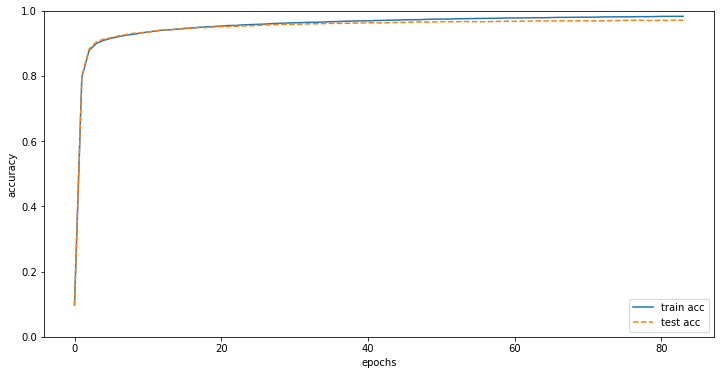

In [34]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6

# Accuracy 그래프
markers = {'trian': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

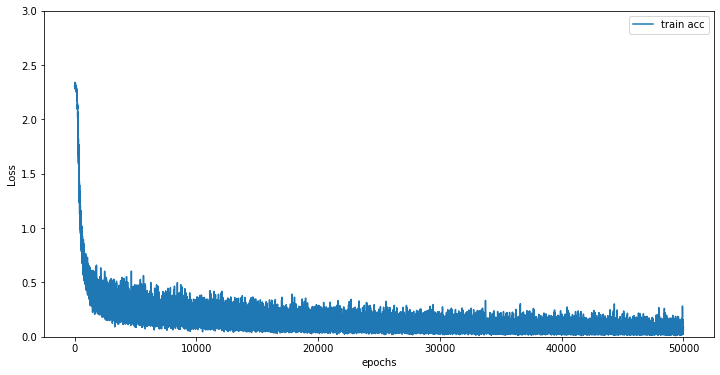

In [35]:
# Loss 그래프
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train acc')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.ylim(0, 3.0)
plt.legend(loc='best')
plt.show()